In [1]:
import warnings
warnings.filterwarnings('ignore')

### Modelo 1: Clasificación

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from pickle import load, dump

digits = datasets.load_digits()
features = digits.data
target = digits.target

model = LogisticRegression()
model.fit(features, target)
model.score(features, target)

dump(model, open('./models/2021-01-22-lr.pkl', 'wb'))

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets
from pickle import load, dump

digits = datasets.load_digits()
features = digits.data
target = digits.target

features_train, features_test, target_train, target_test = train_test_split(features, target)

model = LogisticRegression()
model.fit(features_train, target_train)
model.score(features_test, target_test)

dump(model, open('./models/2021-01-22-lr.pkl', 'wb'))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from pickle import load, dump

digits = datasets.load_digits()
features = digits.data
target = digits.target

features_train, features_test, target_train, target_test = train_test_split(features, target)

model = LogisticRegression()
standarizer = StandardScaler()
pipeline = Pipeline([('standarizer', standardizer), 
                     ('lr', model)])

pipeline.fit(features_train, target_train)
pipeline.score(features_test, target_test)

dump(pipeline, open('./models/2021-01-22-lr-standscaler.pkl', 'wb'))

### Ejercicio: Regresión

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from pickle import load, dump


boston = datasets.load_boston()
features, target = boston.data, boston.target

features_train, features_test, target_train, target_test = train_test_split(features, target)

""" Modelo 1 """
model = Lasso()
standarizer = StandardScaler()
pipeline = Pipeline([('standarizer', standardizer), 
                     ('lr', model)])

pipeline.fit(features_train, target_train)
print(pipeline.score(features_test, target_test))

""" Modelo 2 """
model = Lasso()
model.fit(features_train, target_train)
print(model.score(features_test, target_test))

### Semillas

0.771320643266746
0.771320643266746
0.771320643266746
0.771320643266746
0.771320643266746


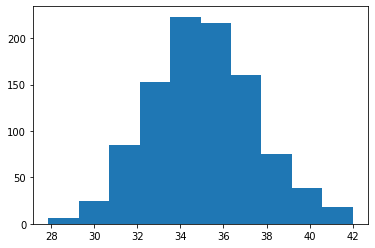

In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.randn()

for i in range(5):
    np.random.seed(10)
    n = np.random.rand()
    print(n)
    
mu = 35
sigma = 2.5
np.random.randn() * sigma+ mu

np.random.randn(10) * sigma+ mu

n = np.random.randn(1000) * sigma+ mu
plt.hist(n)
plt.show()

In [18]:
digits = datasets.load_digits()
features = digits.data
target = digits.target

X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1)

model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9688888888888889

### Comparación de algoritmos

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

digits = datasets.load_digits()
features = digits.data
target = digits.target

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC()))

X_train, X_test, y_train, y_test = train_test_split(features, target)

for name, model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(name, ': ', str(score))

LR :  0.9688888888888889
LDA :  0.9666666666666667
KNN :  0.9933333333333333
DTC :  0.8644444444444445
NB :  0.8533333333333334
RFC :  0.98
SVM :  0.9888888888888889


### Ejercicio: Regresión

In [32]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

boston = datasets.load_boston()
features, target = boston.data, boston.target

features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=99)

models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso(random_state=99)))
models.append(('RFR', RandomForestRegressor(random_state=99)))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor(random_state=99)))

for name, model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(name, ': ', str(score))

LR :  0.6220514951399005
LASSO :  0.4894584693965284
RFR :  0.8841430843211482
KNN :  0.9850879167458381
CART :  0.6516655217270562
